# Lab 4: Simple harmonic oscillations and second-order methods

**Goal**: Compare the first-order Euler method with second-order methods. 




- Recall, that given

\begin{equation*}
\frac{d x(t)}{dt} = F(x,t), ~~t^i \le t \le t^f
\end{equation*}

we want to find

\begin{equation*}
x(t), ~~t^i \le t \le t^f
\end{equation*}

- Basic algorithm uses an intermediate time (fractional) step to "leapfrog" to the next whole time step.  

\begin{equation*}
x^{n+1} = x^n  + \Delta t (\gamma_1 F^n + \gamma_2 F^{n+\alpha})
\end{equation*}

- Choose $\gamma_1$, $\gamma_2$, and $\alpha$ such that the method is consistent with the Taylor series expansion through second order in $\Delta t$ (leading term in the truncation error is $\mathcal{O}((\Delta t^3))$, i.e., 

\begin{align}
x^{n+1} &=& x(t^n + \Delta t) \\ \nonumber
& = & x^n + \Delta t \left( \frac{dx}{dt}\right)^n + \frac{1}{2!} (\Delta t)^2 \left(\frac{d^2 x}{dt^2} \right)^n + O((\Delta t)^3) \\
& = & x^n + \Delta t F^n + \frac{1}{2} (\Delta t)^2 \left(\frac{d F}{dt} \right)^n + O((\Delta t)^3)
\end{align}

Some standard choices:

**Modified Euler method**: $\gamma_1 = 0, \gamma_2 = 1, \alpha = \frac{1}{2}$

\begin{align}
x^{n+1} &=& x^n + \Delta t F^{n+1/2} \\
 &=& x^n + \Delta t F\left(x^n + \frac{1}{2} \Delta t F^n, t^n + \frac{1}{2} \Delta t \right) 
\end{align}

**Improved Euler method**: $\gamma_1 = \frac{1}{2}, \gamma_2 = \frac{1}{2}, \alpha = 1$

\begin{align}
x^{n+1} & = &  x^n + \frac{1}{2} \Delta t \left(F^n + F^{n+1}\right) \\ 
&=& x^n + \frac{1}{2} \Delta t \left[ F^n + F\left(x^n +  \Delta t F^n, t^n + \Delta t\right) \right]
\end{align}

## Exercise 1:  Log-log plots

Suppose we wish to test whether two variables $y and x$ satisfy some particular functional relationship $y = f(x)$.  The simplest relation is linear, i.e., y = mx +b.  The existence of such a relationship can be seen by plotting $y$ vs. $x$.

Now suppose that $y$ is not a linear function of $x$. For instance, $y(x)$ could be of the form

$$ y(x) = A e^{rx}$$

where $A$ and $r$ and unknown parameters.  


We can take the natural logarithm of both sides, giving

$$ \ln y = \ln A + rx$$.

A plot a $\ln y$ vs. $x$ (semi-log) would be a straight line with slope $r$ and intercept $\ln A$.  

Now consider a power law function of the form

$$ y(x) = A x^r$$.

Taking the natural log of both sides yields

$$\ln y = \ln A + r \ln x$$.

In this case, plotting $\ln y$ vs. $\ln x$ (log-log) gives a straight line with slope $r$ and intercept $\ln A$.

1. Compute the numerical values of the period $T$ for different values of $\omega_0$.  Assume that $T \propto (k/m)^\alpha$ and estimate the exponent by making a log-log plot of $T$ vs. $k/m$.


In [1]:
#Name: Jasmine Kobayashi
#Lab 4: SHO & Second order methods
#Date: 2/6/20
#---------------------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#---------------------------------------------------------------------------------------------------------------------------

om0 = np.linspace(1,10,100)            #omega values

Ta = []                                #period values
for i in range (0,len(om0)):
    Tp = 2*np.pi/(om0[i])
    Ta.append(Tp)
    

#T vs. omega plot    
plt.figure(1)
plt.plot(om0**2,Ta)
plt.title("Period (T) vs. Omega$^2$($\omega^2$)")
plt.xlabel("$\omega^2$ (k/m)")
plt.ylabel("Period T")
# plot ln(T) vs. ln(k/m)
plt.figure(2)
plt.plot(np.log(om0**2),np.log(Ta))
plt.title("Log-Log Plot")
plt.xlabel("log(k/m)")
plt.ylabel("log(T)")

#linear regression
om = LinearRegression()
お = np.log(om0**2)
お = お.reshape((-1,1))
om.fit(お,np.log(Ta))
print("Exponent of k/m =", om.coef_)

Exponent of k/m = [-0.5]


## Exercise 2:  Truncation error

2. Write python functions for modified Euler and improved Euler.  Try to generalize as much as possible (i.e., don't make the function dependent on a particular ODE like exponential decay vs. SHO). 

3. Repeat the last part of Lab 2 (truncation error), solving the dimensionless ODE, comparing the %error $\tau = 1$.  Plot %error vs. $d\tau$ for each of the three methods.  Are the second order methods $\propto \Delta t^2$ (plot log-log)?


slope 1st order = [0.99153445]
second order slope = [1.99549552]


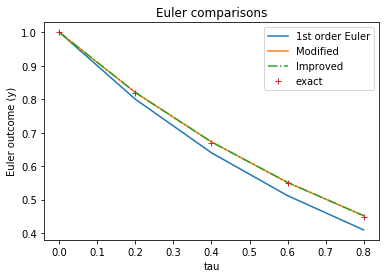

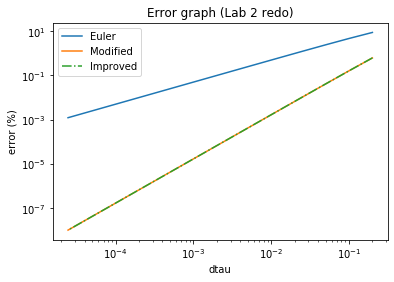

In [2]:
# Use your dimensionless ODO function from lab 2 here.  Add functions for modified and improved Euler.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#---------------------------------------------------------------------------------
def F(y0): #dy/dx = -y
    return -y0 
#---------------------------------------------------------------------------------

#---------------------------------------------------------------------------------
def euler(dtau,tau,y0):
    #y0 is y(tau=0), initial condition
    #tau is the dimensionless time array
    #dtau is the time step 
    y = []                          #initialize an array for the output
    y.append(y0)
    for n in range(1,len(tau)):     
        y0 = y0 + F(y0)*dtau
        y.append(y0)                #add the n+1 value to y array
    return y
#---------------------------------------------------------------------------------

#---------------------------------------------------------------------------------
def euler_modified(dtau,tau,y0):
    #y0 is y(tau=0), initial condition
    #tau is the dimensionless time array
    #dtau is the time step 
    y = []
    for n in range(0,len(tau)):
        y.append(y0)
        yph = y0 + (F(y0)*dtau/2)           #F^n+(0.5) 
        y0 = y0 + F(yph)*dtau               #y^n+1 using F^n+0.5
    return y
#---------------------------------------------------------------------------------

#---------------------------------------------------------------------------------
def euler_improved(dtau,tau,y0):
    #y0 is y(tau=0), initial condition
    #tau is the dimensionless time array
    #dtau is the time step 
    y = []
    for n in range(0,len(tau)):
        y.append(y0)
        ypi = y0 + F(y0)*dtau               #F^n+1
        y0 = y0 + (F(y0)+F(ypi))*dtau/2     #y^n+1 using F^n & F^n+1
    return y
#---------------------------------------------------------------------------------

#set up tau array
tau_final = 1.0
dtau_array =[]
dtau = 0.2
for i in range(14):
    dtau_array.append(dtau)
    dtau = dtau/2.
    
dy_array = []
y0 = 1.0
#Euler Graphs---------------------------------------------------------------------
plt.figure(1)
dtau = 0.2
tau = np.arange(0,tau_final,dtau)
plt.plot(tau,euler(dtau,tau,y0),label='1st order Euler')
plt.title("Euler comparisons")
plt.xlabel("tau")
plt.ylabel("Euler outcome (y)")
#Add a comparison of the secord order methods
plt.plot(tau,euler_modified(dtau,tau,y0),label="Modified")
plt.plot(tau,euler_improved(dtau,tau,y0),"-.",label="Improved")
plt.plot(tau,np.exp(-tau),'+',label='exact')
plt.legend()

#Lab 2 repeat--------------------------------------------------------------------
dy_m = []                          #dy for modified
dy_i = []                          #dy for improved
for i in range(len(dtau_array)):
    tau = np.arange(0,tau_final,dtau_array[i])
    y = euler(dtau_array[i],tau,y0)
#add second order methods
    dy_array.append(100*(abs(y[-1]-np.exp(-tau[-1]))/np.exp(-tau[-1])))
    mod = euler_modified(dtau_array[i],tau,y0)
    imp = euler_improved(dtau_array[i],tau,y0)
    dy_m.append(100*(abs(mod[-1]-np.exp(-tau[-1]))/np.exp(-tau[-1])))
    dy_i.append(100*(abs(imp[-1]-np.exp(-tau[-1]))/np.exp(-tau[-1])))


#Lab 2 Error Graph----------------------------------------------------------------
plt.figure(2)
plt.plot(dtau_array,dy_array,label='Euler')
#add second-order plots
plt.plot(dtau_array,dy_m,label = "Modified")
plt.plot(dtau_array,dy_i,"-.",label = "Improved")
plt.xlabel('dtau')
plt.ylabel('error (%)')
plt.title("Error graph (Lab 2 redo)")
plt.yscale('log')
plt.xscale('log')
plt.legend()

#use linear regression to determine the slope.  
model=LinearRegression()
x = np.log(dtau_array)
x = x.reshape((-1,1))           #What does reshape do? Look it up and try printing before and after.
model.fit(x,np.log(dy_array))
print('slope 1st order =', model.coef_)

second=LinearRegression()
second.fit(x,np.log(dy_i))
print("second order slope =", second.coef_)

## Exercise 3:  Simple harmonic oscillator (SHO)

4. Now apply the three Euler ODE methods to the SHO problem (mass on a spring) and compute $\Delta^n$ (homework) over one cycle.  

5. Plot the numerical solutions with the analytical solution [$x(t) = A \cos(\omega_0 t + \delta)$].

6. Plot the time dependence of the potential energy and the kinetic energy through one cycle.  Where in the cycle is the kinetic energy a maximum?


In [12]:
#Simple Harmonic Oscillator
omega2 = 9                    #omega^2 = (k/m) (k= spring constant,m = mass)
T = 2*np.pi/np.sqrt(omega2)   #Period (units = seconds)
dt = 0.01*T                   #time step, in relation to period
x0 = 1.0                      #Initial position (displacement from equilibrium position) (units=meters?)
v0 = 0.0                      #Initial velocity (m/s?)

def vdot(omega2,x0):          #acceleration(dv/dt)(b/c x"(t) = -omega^2*x); just to make F^n for velocity easier to identify
    return -omega2*x0
#-----------------------------------------SHO Euler Functions---------------------------------------------------------------
#First order Euler
def SHO(x0,v0,omega2,T,dt):      #Simple Harmonic Oscillator (outputs, array of position, vel., and time of 2 periods)
    x = []                       #position (disp. from equi. position)
    v = []                       #velocity
    time = []                    #time
    t = 0.0                      #initial time
    tfinal = T                   #ends after one period(one cycle)
    while t < tfinal:
        time.append(t)
        x.append(x0)
        v.append(v0)
        vp = v0 + vdot(omega2,x0)*dt       #F^n+1 = v^n+1 = v^n + (dv/dt)*dt
        x0 = x0 + v0*dt                    #x^n+1 = x^n + (F^n)*dt
        v0 = vp
        t = t+dt
    return x, v, time

#Modified Euler
def SHO_mod(x0,v0,omega2,T,dt):  
    xm = []                       #position (disp. from equi. position)
    vm = []                       #velocity
    time_m = []                   #time
    t = 0.0                       #initial time
    tfinal = T                    #ends after one period(one cycle)
    while t < tfinal:
        time_m.append(t)
        xm.append(x0)
        vm.append(v0)
        xph = x0 +(0.5)*v0*dt              #x^n+0.5 = x^n + (1/2)*(F^n)*dt
        vp = v0 + vdot(omega2,xph)*dt      #F^n+1; v^n+1 using x^n+0.5
        vph = v0 + (vdot(omega2,x0)*dt)/2  #F^n+0.5 (v^n+0.5)   
        xp = x0 + vph*dt                   #x^n+1 = x^n + (F^n+0.5)*dt   
        x0 = xp
        v0 = vp
        t = t + dt                 
    return xm, vm, time_m

#Improved Euler
def SHO_impr(x0,v0,omega2,T,dt):
    xi = []                       #position (disp. from equi. position)
    vi = []                       #velocity
    time_i = []                   #time
    t = 0.0                       #initial time
    tfinal = T                    #ends after one period(one cycle)
    while t < tfinal:
        time_i.append(t)
        xi.append(x0)
        vi.append(v0)
        xpi = x0 + v0*dt                   #x^n+1 = x^n + F^n*(dt); x^n+1 1st order that'll be used in 2nd order
        vp = v0 + vdot(omega2,xpi)*dt      #F^n+1; v^n+1 using x^n+1 first order
        xp = x0 + (v0+vp)*dt*0.5           #x^n+1 = x^n + (1/2)(dt)(F^n + F^n+1); Second order x^n+1
        v0 = vp
        x0 = xpi
        t = t + dt
    return xi, vi, time_i

[x,v,time] = SHO(x0,v0,omega2,T,dt)
[xma,vma,時ma] = SHO_mod(x0,v0,omega2,T,dt)
[xI,vI,時I] = SHO_impr(x0,v0,omega2,T,dt)

#Difference in Energy-------------------------------------------------------------------------------------------------------
E0_下m =(0.5)*omega2*(x0**2)               #Initial energy (E0/m)
print("Initial Energy=",E0_下m)

#First order
E = []                                     #Total energy array
dif = []                                   #Difference in energy array
for k in range(0,len(x)):
    Eom = (0.5)*v[k]**2 + (0.5)*omega2*(x[k]**2) #E/m = (1/2)v^2 + (1/2)(k/m)(x^2) 
    E.append(Eom)
    d = (E[k]-E0_下m)/E0_下m                #The difference of energy between initial and at a certain time step
    dif.append(d)

#Second Order
#Modified Euler
Em = []                                     #Total energy (Modified)
difm = []                                   #Difference in energy (Modified)
EI = []                                     #Total energy (Improved)
difI = []                                   #Diff. in energy (Improved)
for i in range(0,len(xma)):
    Eomm = ((0.5)*(vma[i]**2)) + ((0.5)*omega2*(xma[i]**2)) #Energy at time step n for modified
    Em.append(Eomm)
    dm = (Em[i]-E0_下m)/E0_下m              #Difference in energy
    difm.append(dm)
#Improved Euler   
for j in range(0,len(xI)):
    Eomi = ((0.5)*(vI[j]**2)) + ((0.5)*omega2*(xI[j]**2))   #Energy at time step n for improved
    EI.append(Eomi)
    di = (EI[j]-E0_下m)/E0_下m              #Difference in energy
    difI.append(di)

Initial Energy= 4.5


Text(0, 0.5, '$\\Delta^n$')

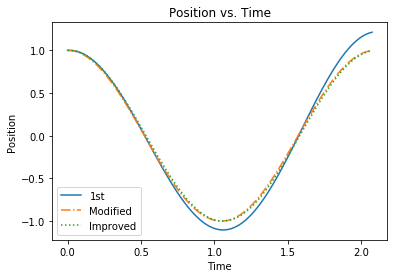

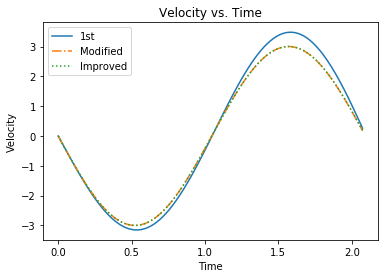

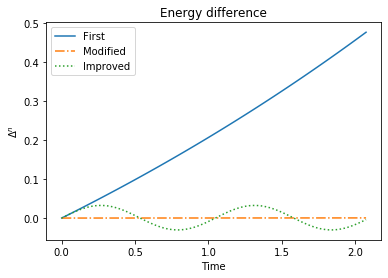

In [13]:
#Graphs
#position vs time
plt.figure(1)
plt.plot(time,x,label = "1st")
plt.plot(時ma,xma,"-.",label = "Modified")
plt.plot(時I,xI,":",label = "Improved")
plt.legend()
plt.title("Position vs. Time")
plt.xlabel("Time")
plt.ylabel("Position")
#Velocity vs time
plt.figure(2)
plt.plot(time,v,label = "1st")
plt.plot(時ma,vma,"-.",label = "Modified")
plt.plot(時I,vI,":",label = "Improved")
plt.legend()
plt.title("Velocity vs. Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
#Energy difference
plt.figure(3)
plt.plot(time,dif,label = "First")
plt.plot(時ma,difm,"-.",label="Modified")
plt.plot(時I,difI,":",label = "Improved") 
plt.legend()
plt.title("Energy difference")
plt.xlabel("Time")
plt.ylabel("$\Delta^n$")

Text(0, 0.5, '$\\Delta^n$')

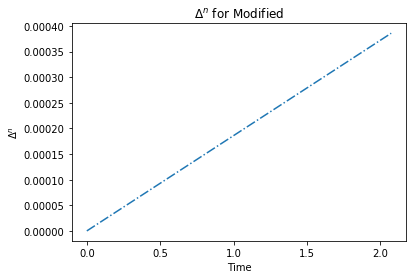

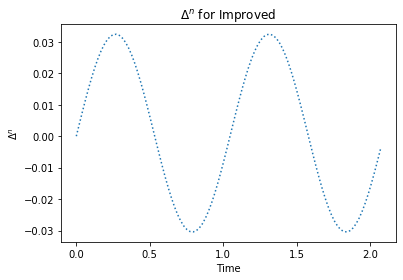

In [14]:
#Close ups of Second order Energy differences
plt.figure(1)
plt.plot(時ma,difm,"-.",label="Modified")
plt.title("$\Delta^n$ for Modified")
plt.xlabel("Time")
plt.ylabel("$\Delta^n$")
plt.figure(2)
plt.plot(時I,difI,":",label = "Improved")
plt.title("$\Delta^n$ for Improved")
plt.xlabel("Time")
plt.ylabel("$\Delta^n$")

### Ex.3 cont.
5. Plot the numerical solutions with the analytical solution [$x(t) = A \cos(\omega_0 t + \delta)$].

Text(0, 0.5, 'Position')

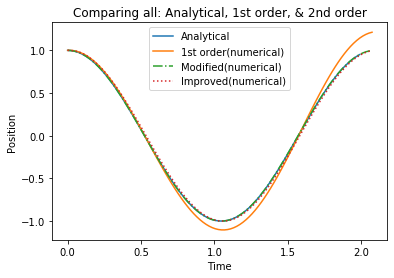

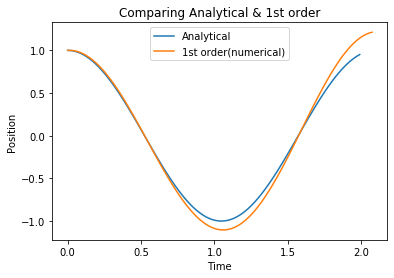

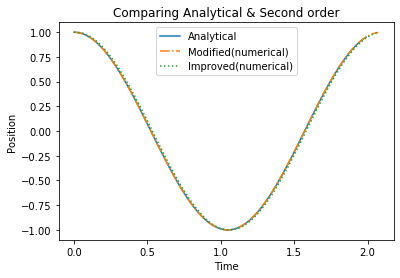

In [6]:
#numerical vs analytical comparison
om = omega2**(1/2)
ta = np.arange(0,2,dt)
#Analytical solution
def analytical(om,t):  
    return np.cos(om*t)       #x = Acos(omega*(t) + phase); where A(Amplitude) = 1, phase = 0

Xa=[]
for i in range(0,len(ta)):
    xあ = analytical(om,ta[i])
    Xa.append(xあ)
    
#comparison graph
plt.figure(1)
plt.plot(ta,Xa,label = "Analytical")
plt.plot(time,x,label = "1st order(numerical)")
plt.plot(時ma,xma,"-.",label = "Modified(numerical)")
plt.plot(時I,xI,":",label = "Improved(numerical)")
plt.legend()
plt.title("Comparing all: Analytical, 1st order, & 2nd order")
plt.xlabel("Time")
plt.ylabel("Position")
plt.figure(2)
plt.plot(ta,Xa,label = "Analytical")
plt.plot(time,x,label = "1st order(numerical)")
plt.legend()
plt.title("Comparing Analytical & 1st order")
plt.xlabel("Time")
plt.ylabel("Position")
plt.figure(3)
plt.plot(ta,Xa,label = "Analytical")
plt.plot(時ma,xma,"-.",label = "Modified(numerical)")
plt.plot(時I,xI,":",label = "Improved(numerical)")
plt.legend()
plt.title("Comparing Analytical & Second order")
plt.xlabel("Time")
plt.ylabel("Position")

### Ex.3 cont.
6. Plot the time dependence of the potential energy and the kinetic energy through one cycle.  Where in the cycle is the kinetic energy a maximum?

Text(0, 0.5, 'Kinetic Energy')

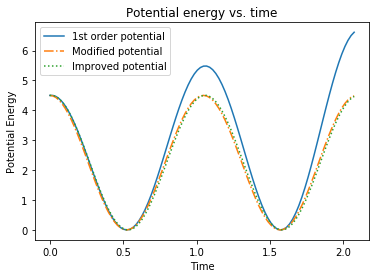

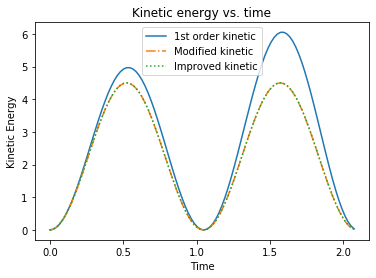

In [7]:
#Potential and Kinetic
#First order
UE = []                      #Potential
KE = []                      #Kinetic
for k in range(0,len(x)):
    U = (0.5)*omega2*(x[k]**2)
    UE.append(U)
    K = (0.5)*v[k]**2
    KE.append(K)

#Second Order
#Modified
UEm = []                     #Potential (Modified)
KEm = []                     #Kinetic (Modified)
for i in range(0,len(xma)):
    Um =((0.5)*omega2*(xma[i]**2)) 
    UEm.append(Um)
    Km =  ((0.5)*(vma[i]**2))             
    KEm.append(Km)
#Improved
UEi = []                     #Potential (Improved)
KEi = []                     #Kinetic (Improved)
for j in range(0,len(xI)):
    Ui = ((0.5)*omega2*(xI[j]**2))   
    UEi.append(Ui)
    Ki = ((0.5)*(vI[j]**2))
    KEi.append(Ki)
#Graphs
plt.figure(1)
plt.plot(time,UE,label="1st order potential")
plt.plot(時ma,UEm,"-.",label="Modified potential")
plt.plot(時I,UEi,":",label="Improved potential")
plt.legend()
plt.title("Potential energy vs. time")
plt.xlabel("Time")
plt.ylabel("Potential Energy")
plt.figure(2)
plt.plot(time,KE,label="1st order kinetic")
plt.plot(時ma,KEm,"-.",label="Modified kinetic")
plt.plot(時I,KEi,":",label="Improved kinetic")
plt.legend()
plt.title("Kinetic energy vs. time")
plt.xlabel("Time")
plt.ylabel("Kinetic Energy")

In [8]:
#Maximum kinetic energy
km = time[KE.index(max(KE))]           #Time of max kinetic energy for first order
kmm = 時ma[KEm.index(max(KEm))]        #Time of max kinetic energy for modified
kmi = 時I[KEi.index(max(KEi))]         #Time of max kinetic energy for improved
print("Max kinetic energy at time="+str(km),"sec. for first order Euler.")
print("Max kinetic energy at time="+str(kmm),"sec. for second order Euler.") 
#Only used time for 'modified' here for time of second order, but if I used time of 'improved' it would still be the same.(Which makes sense)

Max kinetic energy at time=1.5917402778188297 sec. for first order Euler.
Max kinetic energy at time=1.5707963267948977 sec. for second order Euler.
